In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
from PIL import Image as im
import csv
import sys

Olusturdugumuz spectogramlara erismek icin drive'imizi bagliyoruz

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
spects_path = '/content/drive/MyDrive/Colab Notebooks/spectograms/'

Öncelikle spectogramlarımızı inceleyelim

(288, 432, 3)


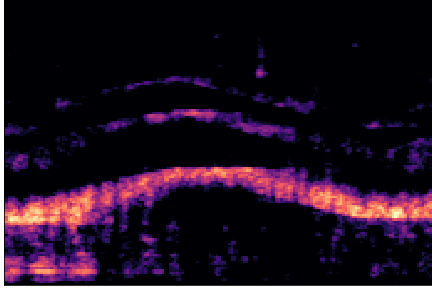

In [4]:
test_img = spects_path + 'noiseless/8/102853-8-0-0.png'
img = cv2.imread(test_img)
print(img.shape)
Image(test_img)

Görüntülerin boyutlarını 100x100 yapacağımız için ve burda resim kalitesinden daha az taviz vermek için resimlerin etrafındaki beyaz alanlardan kurtulalım

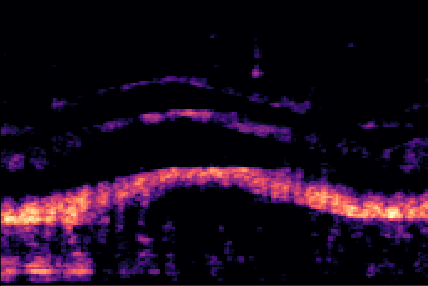

In [5]:
crop = img[0:286, 4:432]
cv2.imwrite('crop_test.png',crop)
Image('crop_test.png')

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.09803922 0.09803922 0.09803922]
 [0.09803922 0.09803922 0.09803922 ... 0.18431373 0.18431373 0.18431373]]


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.09803922, 0.09803922,
        0.09803922],
       [0.09803922, 0.09803922, 0.09803922, ..., 0.18431373, 0.18431373,
        0.18431373]])

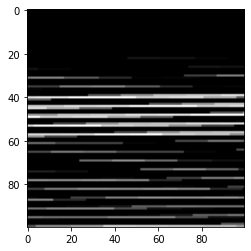

In [6]:
def preprocess(file_path, show = False):
  img = cv2.imread(file_path)
  crop = img[0:286, 4:432]
  gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY) # grayscale
  gray.resize((100,100))                        # resizing

  arr = np.array(gray)
  normalized_arr = arr / 255    # normalization

  if show: # Show for testing
    print(normalized_arr)
    PIL_image = im.fromarray(np.uint8(arr))
    plt.imshow(PIL_image, cmap='gray')
  
  return normalized_arr

filepath = spects_path + 'noiseless/1/100648-1-0-0.png'
preprocess(filepath, show=True)

In [7]:
np.set_printoptions(threshold=sys.maxsize) #Numpy array kisaltmasini engeller
def create_data_list(base_path):
    data_list = []
    for directory in [d for d in os.listdir(base_path)]:
      dir = os.path.join(base_path, directory)
      if os.path.isdir(dir):
        for filename in os.listdir(dir):
          f = os.path.join(dir, filename)
          data = [preprocess(f), directory]
          data_list.append(data)
    return data_list
      

In [8]:
for spectogram_type in ['noiseless/', 'vanilla/']:
  path = spects_path + spectogram_type
  outfile = spectogram_type[:-1] + '.csv'
  data = create_data_list(path)
  with open(outfile, 'w') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerows(data)

In [9]:
%cp -vn /content/*.csv '/content/drive/MyDrive/Colab Notebooks/'